# Create unified catalog
Update of the 31/07/2023 : author [tomsail](https://github.com/tomsail) (Thomas Saillour)

In [1]:
import pandas as pd
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt
import shapely

In [2]:
%matplotlib widget

## COOPS

In [3]:
from searvey.coops import coops_stations

coops = coops_stations()
coops

,nws_id,name,state,status,removed,geometry
nos_id,,,,,,
1600012,46125,QREB buoy,,active,<NA>,POINT (122.60028 37.75008)
1619910,SNDP5,"Sand Island, Midway Islands",,active,<NA>,POINT (-177.36000 28.21167)
1630000,APRP7,"Apra Harbor, Guam",,active,<NA>,POINT (144.65636 13.44339)
1631428,PGBP7,"Pago Bay, Guam",,active,<NA>,POINT (144.79700 13.42830)
1770000,NSTP6,"Pago Pago, American Samoa",,active,<NA>,POINT (-170.68944 -14.27667)
...,...,...,...,...,...,...
8770570,SBPT2,Sabine Pass North,TX,discontinued,"2021-01-18 00:00:00,2020-09-30 15:45:00,2020-0...",POINT (-93.87010 29.72840)
8775870,MQTT2,"Bob Hall Pier, Corpus Christi",TX,discontinued,"2021-12-22 20:00:00,2020-05-18 13:10:00,2019-0...",POINT (-97.21670 27.58000)
8740166,GBRM6,"Grand Bay NERR, Mississippi Sound",MS,discontinued,"2022-04-07 00:00:00,2022-03-30 23:58:00,2015-1...",POINT (-88.40289 30.41319)


In [4]:
### get lat/lon
coops['lon'] = coops['geometry'].x
coops['lat'] = coops['geometry'].y


In [5]:
coops = coops.drop('geometry',axis=1)
coops

,nws_id,name,state,status,removed,lon,lat
nos_id,,,,,,,
1600012,46125,QREB buoy,,active,<NA>,122.600281,37.750080
1619910,SNDP5,"Sand Island, Midway Islands",,active,<NA>,-177.360001,28.211670
1630000,APRP7,"Apra Harbor, Guam",,active,<NA>,144.656357,13.443390
1631428,PGBP7,"Pago Bay, Guam",,active,<NA>,144.796997,13.428300
1770000,NSTP6,"Pago Pago, American Samoa",,active,<NA>,-170.689438,-14.276670
...,...,...,...,...,...,...,...
8770570,SBPT2,Sabine Pass North,TX,discontinued,"2021-01-18 00:00:00,2020-09-30 15:45:00,2020-0...",-93.870102,29.728399
8775870,MQTT2,"Bob Hall Pier, Corpus Christi",TX,discontinued,"2021-12-22 20:00:00,2020-05-18 13:10:00,2019-0...",-97.216698,27.580000
8740166,GBRM6,"Grand Bay NERR, Mississippi Sound",MS,discontinued,"2022-04-07 00:00:00,2022-03-30 23:58:00,2015-1...",-88.402893,30.413191


## IOC

In [6]:
from searvey import ioc
ioc_stations = ioc.get_ioc_stations()
ioc_stations['lon'] = ioc_stations['geometry'].x
ioc_stations['lat'] = ioc_stations['geometry'].y
ioc_stations = ioc_stations.drop('geometry',axis=1)
ioc_stations

,ioc_code,gloss_id,lat,lon,country,location,connection,contacts,dcp_id,last_observation_level,...,observations_arrived_per_week,observations_expected_per_week,observations_ratio_per_week,observations_arrived_per_month,observations_expected_per_month,observations_ratio_per_month,observations_ratio_per_day,sample_interval,average_delay_per_day,transmit_interval
0,abas,327,44.020,144.290,Japan,Abashiri,SWJP40,Japan Meteorological Agency ( Japan ),ABASHIRI,2.15,...,10080,10080.0,100,44470,44640.0,100,100,1',8',10'
1,abed,<NA>,57.140,-2.080,UK,Aberdeen,ftp,National Oceanography Centre ( UK ),NaN,2.45,...,667,672.0,99,2951,2976.0,99,100,15',25',15'
2,abur,82,31.580,131.410,Japan,Aburatsu,SWJP40,Japan Meteorological Agency ( Japan ),ABURATSU,3.13,...,10080,10080.0,100,44470,44640.0,100,100,1',8',10'
3,acaj,182,13.574,-89.838,El Salvador,Acajutla,SZXX01,Ministerio de Medio Ambiente y Recursos Natura...,300434064008810,6.99,...,8740,10080.0,87,39982,44640.0,90,83,1',2',5'
4,acap,267,16.833,-99.917,Mexico,Acapulco,SEPA40,Centro de Investigación Científica y de Educac...,3540E15A,8.26,...,-down-,10080.0,0,-down-,NaN,0,0,1',NaN,5'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,zhap,78,21.580,111.820,China,Zhapo,SZCI01,China Meteorological Administration ( China ),09731,0.73,...,4461,10080.0,44,18960,44640.0,42,45,1',14',1'
1521,zihu,<NA>,17.637,-101.558,Mexico,"Zihuatanejo, Gro",ftp,Universidad Nacional Autónoma de México ( Mexi...,NaN,3.07,...,6597,10080.0,65,33332,44640.0,75,79,1',23',15'
1522,zihu2,<NA>,17.636,-101.558,Mexico,Zihuatanejo2,SOMX10,Universidad Nacional Autónoma de México ( Mexi...,0102D23E,3.12,...,9910,10080.0,98,43950,44640.0,98,99,1',8',10'
1523,zygi,<NA>,34.727,33.338,Cyprus,Zygi,ftp,Cyprus Oceanography Center ( Cyprus ),NaN,1.91,...,-down-,20160.0,0,-down-,NaN,0,0,0.5',NaN,1'


## EMODNET

In [7]:
emodnet = pd.read_csv('emodnet.csv')
emodnet = emodnet.drop_duplicates(['EP_PLATFORM_ID'])
emodnet

,Unnamed: 0,EP_PLATFORM_ID,EP_PLATFORM_TYPE,EP_PLATFORM_CODE,EP_PLATFORM_LINK,TIME_QC (1),latitude (degrees_north),longitude (degrees_east),SLEV_QC (1),SLEV_DM,...,area,author,source,contributor_name,contributor_url,data_assembly_center,institution_edmo_code,institution_references,institution,wmo_platform_code
0,0,8397,TG,AjaccioTG,http://www.emodnet-physics.eu/Map/spi.aspx?id=...,1,41.92270,8.76290,1,\u0000,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
4,5864277,8425,TG,ArcachonEyracTG,http://www.emodnet-physics.eu/Map/spi.aspx?id=...,1,44.66500,-1.16350,1,\u0000,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
8,11550389,371096,TG,AudierneTG,http://www.emodnet-physics.eu/Map/spi.aspx?id=...,1,48.02155,-4.53758,1,\u0000,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
12,13443083,638729,TG,BaliseARouenTG,http://www.emodnet-physics.eu/Map/spi.aspx?id=...,1,49.43183,0.11067,1,\u0000,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
13,13443197,8447,TG,BayonneBoucauTG,http://www.emodnet-physics.eu/Map/spi.aspx?id=...,1,43.52730,-1.51540,1,\u0000,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,262348559,8901,TG,SolenzaraTG,http://www.emodnet-physics.eu/Map/spi.aspx?id=...,1,41.85686,9.40383,1,D,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
275,266904056,368642,TG,ThioTG,http://www.emodnet-physics.eu/Map/spi.aspx?id=...,1,-21.61381,166.24153,1,\u0000,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
279,270225196,8985,TG,ToulonTG,http://www.emodnet-physics.eu/Map/spi.aspx?id=...,1,43.12280,5.91460,1,\u0000,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
283,271731957,371433,TG,TubuaiTG,http://www.emodnet-physics.eu/Map/spi.aspx?id=...,1,-23.34177,-149.47554,1,\u0000,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540,NaN,SHOM Service Hydrographique et Oceanographique...,NaN


## CMEMS

In [8]:
cmems = pd.read_csv('cmems.csv')
cmems = cmems.drop(cmems.columns[0],axis=1)
cmems = cmems.drop_duplicates()

In [9]:
cmems

,PLATFORM_NAME,PLATFORM_CODE,INSTITUTION,INSTITUTION_EDMO_CODE,latitude (degrees_north),longitude (degrees_east)
0,Aarhus,Aarhus,DMI,469,56.1500,10.21670
1,Althagen,Althagen,BSH,1850,54.3769,12.41940
2,Ark\u00f6 mobi,Arko,SMHI,545,58.4843,16.96070
3,Assens,Assens,DMI,469,55.2667,9.88330
4,Bagenkop,Bagenkop,DMI,469,54.7528,10.67780
...,...,...,...,...,...,...
792,Iles Du Salut,IlesDuSalutTG,SHOM Service Hydrographique et Oceanographiqu...,540,5.2500,-52.62000
849,NaN,IDSL-ZygiMarina,Joint Research Centre(JRC);Cyprus Oceanography...,2688 711,34.7263,33.34020
878,NaN,IDSL-Corinth,Joint Research Centre(JRC);National Observator...,2688 1202,37.9425,22.93360
879,NaN,IDSL-Ciutadella,Joint Research Centre(JRC);Instituto Geogr\u00...,2688,39.9876,3.82815


## GESLA
### Initialize a GeslaDataset object
First clone the following repository: `https://github.com/philiprt/GeslaDataset`.
Also download the whole GESLA3 dataset at this url: `https://gesla787883612.wordpress.com/downloads/`. 

Then place the `gesla.py` file in your working directory (or elsewhere on your path), and import the `GeslaDataset` class. Selecting and loading data files requires paths to the metadata .csv file and the directory containing the data files. Initialize a `GeslaDataset` object with these paths as follows.

In [10]:
meta_file = "./GESLA3_ALL.csv"
data_path = "/home/tomsail/Documents/scripts/Python/GeslaDataset/GESLA3.0_ALL/"
from gesla import GeslaDataset

g3 = GeslaDataset(meta_file=meta_file, data_path=data_path)

For possible future sources we can use gesla sources

In [11]:
g3.meta.contributor_website.unique()
g3.meta

,filename,site_name,site_code,country,contributor_abbreviated,contributor_full,contributor_website,contributor_contact,orginator,originator_website,...,start_date_time,end_date_time,number_of_years,time_zone_hours,datum_information,instrument,precision,null_value,gauge_type,overall_record_quality
0,aasiaat-aas-grl-gloss,Aasiaat,AAS,GRL,GLOSS,Global Sea Level Observing System,https://www.gloss-sealevel.org,I.D.Haigh@soton.ac.uk,Global Sea Level Observing System,https://www.gloss-sealevel.org,...,1997-06-26 15:53:00,1999-06-28 11:18:00,3,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
1,maniitsoq-man-grl-gloss,Maniitsoq,MAN,GRL,GLOSS,Global Sea Level Observing System,https://www.gloss-sealevel.org,I.D.Haigh@soton.ac.uk,Global Sea Level Observing System,https://www.gloss-sealevel.org,...,1997-06-30 21:02:00,1999-06-20 23:53:00,3,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
2,brest-822a-fra-uhslc,Brest,822A,FRA,UHSLC,University of Hawaii Sea Level Center,https://uhslc.soest.hawaii.edu,philiprt@hawaii.edu,Systeme d'Observation du Niveau des Eaux Litto...,Unspecified,...,1846-01-04 00:00:00,2018-12-31 23:00:00,165,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
3,stockholm-826a-swe-uhslc,Stockholm,826A,SWE,UHSLC,University of Hawaii Sea Level Center,https://uhslc.soest.hawaii.edu,philiprt@hawaii.edu,Swedish Meteorological and Hydrographical Ins...,Unspecified,...,1889-01-01 00:00:00,2014-12-31 23:00:00,125,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
4,san_francisco_ca-551a-usa-uhslc,San_Francisco_CA,551A,USA,UHSLC,University of Hawaii Sea Level Center,https://uhslc.soest.hawaii.edu,philiprt@hawaii.edu,National Ocean Service (NOS) National Oceani...,Unspecified,...,1897-08-01 08:00:00,2018-12-31 23:00:00,122,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5114,sian_ka_an-418-mex-unam,Sian_Ka_An,418,MEX,UNAM,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,mareografico@geofisica.unam.mx,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,...,2016-01-01 00:00:00,2018-12-31 23:00:00,3,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
5115,sisal-416-mex-unam,Sisal,416,MEX,UNAM,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,mareografico@geofisica.unam.mx,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,...,2011-01-01 00:00:00,2013-12-30 11:00:00,3,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
5116,zihuatanejo-509-mex-unam,Zihuatanejo,509,MEX,UNAM,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,mareografico@geofisica.unam.mx,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,...,2011-01-01 00:00:00,2013-12-30 11:00:00,3,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
5117,celestun-412-mex-unam,Celestun,412,MEX,UNAM,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,mareografico@geofisica.unam.mx,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,...,2010-01-01 00:00:00,2011-12-31 23:00:00,2,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues


### normalize name, lon, lat

In [12]:
coops = coops.rename(columns={'name':'Station_Name','lon':'longitude','lat':'latitude'})

In [13]:
ioc_stations = ioc_stations.rename(columns={'location':'Station_Name','lon':'longitude','lat':'latitude'})

In [14]:
cmems = cmems.rename(columns={'PLATFORM_NAME':'Station_Name','longitude (degrees_east)':'longitude','latitude (degrees_north)':'latitude'})

In [15]:
emodnet = emodnet.rename(columns={'EP_PLATFORM_CODE':'Station_Name','longitude (degrees_east)':'longitude','latitude (degrees_north)':'latitude'})

In [16]:
gesla3 = g3.meta.rename(columns={'site_name':'Station_Name','longitude':'longitude','latitude':'latitude'})

## Plot

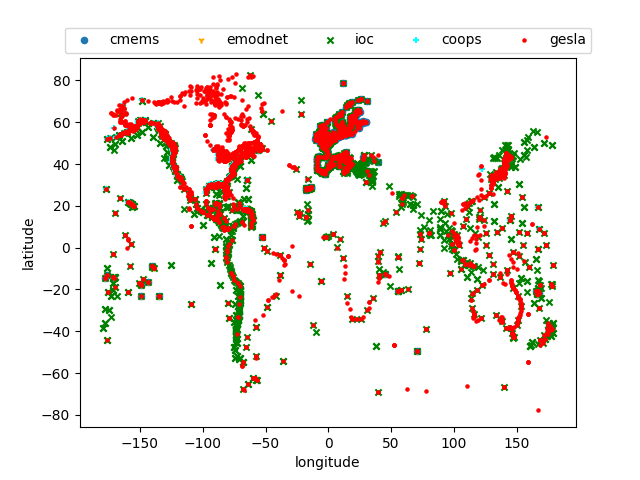

In [17]:
cmems.plot.scatter(x = 'longitude', y = 'latitude', marker='o', label='cmems')
a = plt.gca()
emodnet.plot.scatter(ax=a, x = 'longitude', y = 'latitude', color='orange', marker='1', label='emodnet')
ioc_stations.plot.scatter(ax=a, x = 'longitude', y = 'latitude', color='green', marker='x', label='ioc')
coops.plot.scatter(ax=a, x = 'longitude', y = 'latitude', color='cyan', marker='+', label='coops')
gesla3.plot.scatter(ax=a, x = 'longitude', y = 'latitude', color='red', marker='.',label='gesla')
plt.legend(loc='upper center',bbox_to_anchor=(.5, 1.1), ncol=5)

## Merge COOPS & ioc_stations

#### check duplicates

In [18]:
ioc_ = ioc_stations.loc[ioc_stations.country=='USA']
ioc_

,ioc_code,gloss_id,latitude,longitude,country,Station_Name,connection,contacts,dcp_id,last_observation_level,...,observations_arrived_per_week,observations_expected_per_week,observations_ratio_per_week,observations_arrived_per_month,observations_expected_per_month,observations_ratio_per_month,observations_ratio_per_day,sample_interval,average_delay_per_day,transmit_interval
6,acnj,220,39.355,-74.418,USA,Atlantic City,web,National Ocean Service-NOAA ( USA ),3367B730,1.17,...,10078,10080.0,100,44634,44640.0,100,100,1',4',6'
7,acnj2,220,39.355,-74.418,USA,Atlantic City,SXXX03,National Ocean Service-NOAA ( USA ),3367B730,-7.66,...,9384,10080.0,93,41634,44640.0,93,95,1',7',6'
10,adak,302,51.863,-176.632,USA,Adak,web,National Ocean Service-NOAA ( USA ),3360F60E,1.42,...,10070,10080.0,100,44607,44640.0,100,100,1',6',6'
11,adak2,302,51.863,-176.632,USA,Adak,SXXX03,National Ocean Service-NOAA ( USA ),3360F60E,-1.81,...,9252,10080.0,92,40770,44640.0,91,94,1',5',6'
20,alak,<NA>,56.898,-154.248,USA,Alitak,web,National Ocean Service-NOAA ( USA ),3363341E,4.05,...,10077,10080.0,100,44621,44640.0,100,100,1',5',6'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,wpwa2,<NA>,46.908,-124.110,USA,"Westport, WA",SXXX03,National Ocean Service-NOAA ( USA ),33632768,-5.74,...,-down-,10080.0,0,-down-,NaN,0,0,1',NaN,6'
1507,wsdc,<NA>,38.870,-77.020,USA,Washington,SXXX50,National Ocean Service-NOAA ( USA ),335861BA,NaN,...,NaN,NaN,0,NaN,NaN,0,0,',NaN,6'
1511,yabu,<NA>,18.055,-65.833,USA,"Yabucoa Harbor, PR",SXXX03,Puerto Rico Seismic Network ( USA ) +National ...,3366B5CA,-6.35,...,9007,10080.0,89,39738,44640.0,89,89,1',6',6'
1512,yaku,<NA>,59.548,-139.735,USA,Yakutat,web,National Ocean Service-NOAA ( USA ),336B0522,2.99,...,10070,10080.0,100,44603,44640.0,100,100,1',7',6'


In [19]:
ioc_.country.unique()

array(['USA'], dtype=object)

In [20]:
m1 = pd.merge(ioc_,coops, on=['Station_Name']).Station_Name

In [21]:
m1

0      Atlantic City
1      Atlantic City
2             Alitak
3             Alitak
4            Alameda
           ...      
103           Valdez
104           Valdez
105     Wachapreague
106       Wilmington
107       Washington
Name: Station_Name, Length: 108, dtype: object

In [22]:
i1 = ioc_.loc[ioc_.Station_Name.isin(m1)]
i1 = i1.drop_duplicates(['Station_Name']).reset_index(drop=True)
i1 = i1.sort_values('Station_Name').reset_index(drop=True)
i1

,ioc_code,gloss_id,latitude,longitude,country,Station_Name,connection,contacts,dcp_id,last_observation_level,...,observations_arrived_per_week,observations_expected_per_week,observations_ratio_per_week,observations_arrived_per_month,observations_expected_per_month,observations_ratio_per_month,observations_ratio_per_day,sample_interval,average_delay_per_day,transmit_interval
0,alam,<NA>,37.772,-122.298,USA,Alameda,web,National Ocean Service-NOAA ( USA ),3362E08C,0.96,...,10060,10080.0,100,44532,44640.0,100,100,1',7',6'
1,alak,<NA>,56.898,-154.248,USA,Alitak,web,National Ocean Service-NOAA ( USA ),3363341E,4.05,...,10077,10080.0,100,44621,44640.0,100,100,1',5',6'
2,anch,<NA>,61.238,-149.888,USA,Anchorage,web,National Ocean Service-NOAA ( USA ),3363B20A,4.82,...,NaN,10080.0,0,NaN,NaN,0,0,1',NaN,6'
3,apfl,<NA>,29.727,-84.982,USA,Apalachicola,web,National Ocean Service-NOAA ( USA ),3346C2B4,0.57,...,10075,10080.0,100,44624,44640.0,100,100,1',4',6'
4,aren,<NA>,38.913,-123.705,USA,Arena Cove,web,National Ocean Service-NOAA ( USA ),3368115A,0.44,...,10071,10080.0,100,44600,44640.0,100,100,1',10',6'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,prsc,<NA>,33.655,-78.918,USA,Springmaid Pier,SXXX03,National Ocean Service-NOAA ( USA ),336620A8,NaN,...,NaN,NaN,0,NaN,NaN,0,0,',NaN,6'
68,vald,<NA>,61.125,-146.362,USA,Valdez,SXXX03,National Ocean Service-NOAA ( USA ),33A52D10,NaN,...,NaN,NaN,0,NaN,NaN,0,0,',NaN,6'
69,wava,<NA>,37.600,-75.600,USA,Wachapreague,SXXX03,National Ocean Service-NOAA ( USA ),33659428,NaN,...,NaN,NaN,0,NaN,NaN,0,0,',NaN,6'
70,wsdc,<NA>,38.870,-77.020,USA,Washington,SXXX50,National Ocean Service-NOAA ( USA ),335861BA,NaN,...,NaN,NaN,0,NaN,NaN,0,0,',NaN,6'


In [23]:
g1 = coops.loc[coops.Station_Name.isin(m1)]
g1 = g1.sort_values('Station_Name').reset_index(drop=True)
g1

,nws_id,Station_Name,state,status,removed,longitude,latitude
0,AAMC1,Alameda,CA,active,"2022-11-30 00:00:00,2022-11-29 00:00:00,2021-1...",-122.300262,37.771950
1,ALIA2,Alitak,AK,active,"2022-10-08 00:00:00,2021-10-14 00:00:00,2018-0...",-154.248001,56.897388
2,ANTA2,Anchorage,AK,active,"2022-06-15 21:09:00,2022-06-15 19:33:00,2022-0...",-149.890396,61.237499
3,APCF1,Apalachicola,FL,active,"2022-12-10 12:00:00,2022-05-27 00:00:00,2019-1...",-84.980560,29.724440
4,ANVC1,Arena Cove,CA,active,"2022-10-20 18:00:00,2022-03-18 22:00:00,2022-0...",-123.711082,38.914558
...,...,...,...,...,...,...,...
67,MROS1,Springmaid Pier,SC,active,"2023-06-14 13:52:00,2022-12-07 12:30:00,2022-1...",-78.916389,33.655560
68,VDZA2,Valdez,AK,active,"2022-09-28 20:00:00,2022-09-28 00:00:00,2020-0...",-146.362000,61.125000
69,WAHV2,Wachapreague,VA,active,"2022-06-09 00:00:00,2022-06-08 00:00:00,2022-0...",-75.685829,37.607780
70,WASD2,Washington,DC,active,"2022-08-19 00:00:00,2017-09-21 16:54:00,2017-0...",-77.021667,38.873329


### Lat/Lon differences

In [24]:
np.abs(i1.longitude - g1.longitude).max()

0.08582916259766193

In [25]:
np.abs(i1.latitude - g1.latitude).max()

0.06382928466796756

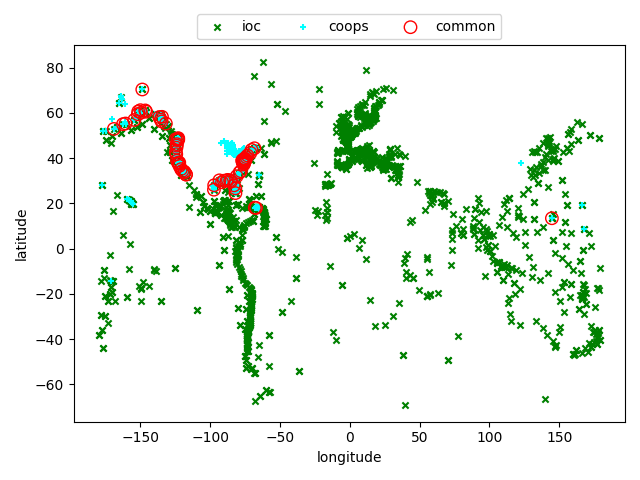

In [26]:
ioc_stations.plot.scatter(x = 'longitude', y = 'latitude', color='green', marker='x', label='ioc')
a = plt.gca()
coops.plot.scatter(ax=a, x = 'longitude', y = 'latitude', color='cyan', marker='+', label='coops')

plt.scatter(x=i1.longitude, y=i1.latitude, s=80, facecolors='none', edgecolors='r', label='common')
plt.legend(loc='upper center',bbox_to_anchor=(.5, 1.1), ncol=10)
plt.tight_layout()

In [27]:
unique = coops[~coops.Station_Name.isin(m1)]
unique

,nws_id,Station_Name,state,status,removed,longitude,latitude
nos_id,,,,,,,
1600012,46125,QREB buoy,,active,<NA>,122.600281,37.750080
1619910,SNDP5,"Sand Island, Midway Islands",,active,<NA>,-177.360001,28.211670
1630000,APRP7,"Apra Harbor, Guam",,active,<NA>,144.656357,13.443390
1770000,NSTP6,"Pago Pago, American Samoa",,active,<NA>,-170.689438,-14.276670
1820000,KWJP8,"Kwajalein, Marshall Islands",,active,<NA>,167.736115,8.731670
...,...,...,...,...,...,...,...
8770570,SBPT2,Sabine Pass North,TX,discontinued,"2021-01-18 00:00:00,2020-09-30 15:45:00,2020-0...",-93.870102,29.728399
8775870,MQTT2,"Bob Hall Pier, Corpus Christi",TX,discontinued,"2021-12-22 20:00:00,2020-05-18 13:10:00,2019-0...",-97.216698,27.580000
8740166,GBRM6,"Grand Bay NERR, Mississippi Sound",MS,discontinued,"2022-04-07 00:00:00,2022-03-30 23:58:00,2015-1...",-88.402893,30.413191


#### normalize country column

In [28]:
ioc_stations = ioc_stations.rename(columns={'country':'Country'})

In [29]:
coops['Country'] = 'United States'

In [30]:
catalog = ioc_stations.append(coops)
catalog.reset_index(inplace=True,drop=True)
catalog

/tmp/ipykernel_19125/442976844.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catalog = ioc_stations.append(coops)


,ioc_code,gloss_id,latitude,longitude,Country,Station_Name,connection,contacts,dcp_id,last_observation_level,...,observations_expected_per_month,observations_ratio_per_month,observations_ratio_per_day,sample_interval,average_delay_per_day,transmit_interval,nws_id,state,status,removed
0,abas,327,44.020000,144.290000,Japan,Abashiri,SWJP40,Japan Meteorological Agency ( Japan ),ABASHIRI,2.15,...,44640.0,100.0,100.0,1',8',10',<NA>,<NA>,NaN,<NA>
1,abed,<NA>,57.140000,-2.080000,UK,Aberdeen,ftp,National Oceanography Centre ( UK ),NaN,2.45,...,2976.0,99.0,100.0,15',25',15',<NA>,<NA>,NaN,<NA>
2,abur,82,31.580000,131.410000,Japan,Aburatsu,SWJP40,Japan Meteorological Agency ( Japan ),ABURATSU,3.13,...,44640.0,100.0,100.0,1',8',10',<NA>,<NA>,NaN,<NA>
3,acaj,182,13.574000,-89.838000,El Salvador,Acajutla,SZXX01,Ministerio de Medio Ambiente y Recursos Natura...,300434064008810,6.99,...,44640.0,90.0,83.0,1',2',5',<NA>,<NA>,NaN,<NA>
4,acap,267,16.833000,-99.917000,Mexico,Acapulco,SEPA40,Centro de Investigación Científica y de Educac...,3540E15A,8.26,...,NaN,0.0,0.0,1',NaN,5',<NA>,<NA>,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,NaN,<NA>,29.728399,-93.870102,United States,Sabine Pass North,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SBPT2,TX,discontinued,"2021-01-18 00:00:00,2020-09-30 15:45:00,2020-0..."
1967,NaN,<NA>,27.580000,-97.216698,United States,"Bob Hall Pier, Corpus Christi",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,MQTT2,TX,discontinued,"2021-12-22 20:00:00,2020-05-18 13:10:00,2019-0..."
1968,NaN,<NA>,30.413191,-88.402893,United States,"Grand Bay NERR, Mississippi Sound",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,GBRM6,MS,discontinued,"2022-04-07 00:00:00,2022-03-30 23:58:00,2015-1..."
1969,NaN,<NA>,43.320000,-70.563301,United States,Wells,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,WELM1,ME,discontinued,"2022-08-03 00:00:00,2016-08-09 12:00:00,2016-0..."


### test it

In [31]:
minlat = g1.latitude.min(),
maxlat = g1.latitude.max(),
minlon = g1.longitude.min(),
maxlon = g1.longitude.max(),

In [32]:
w = catalog.loc[(catalog['longitude'] > minlon) & (catalog['longitude'] < maxlon) & (catalog['latitude'] > minlat) & (catalog['latitude'] < maxlat)]

In [33]:
w.reset_index(inplace=True, drop=True)

In [34]:
w

,ioc_code,gloss_id,latitude,longitude,Country,Station_Name,connection,contacts,dcp_id,last_observation_level,...,observations_expected_per_month,observations_ratio_per_month,observations_ratio_per_day,sample_interval,average_delay_per_day,transmit_interval,nws_id,state,status,removed
0,abas,327,44.020000,144.290000,Japan,Abashiri,SWJP40,Japan Meteorological Agency ( Japan ),ABASHIRI,2.15,...,44640.0,100.0,100.0,1',8',10',<NA>,<NA>,NaN,<NA>
1,abed,<NA>,57.140000,-2.080000,UK,Aberdeen,ftp,National Oceanography Centre ( UK ),NaN,2.45,...,2976.0,99.0,100.0,15',25',15',<NA>,<NA>,NaN,<NA>
2,abur,82,31.580000,131.410000,Japan,Aburatsu,SWJP40,Japan Meteorological Agency ( Japan ),ABURATSU,3.13,...,44640.0,100.0,100.0,1',8',10',<NA>,<NA>,NaN,<NA>
3,acaj,182,13.574000,-89.838000,El Salvador,Acajutla,SZXX01,Ministerio de Medio Ambiente y Recursos Natura...,300434064008810,6.99,...,44640.0,90.0,83.0,1',2',5',<NA>,<NA>,NaN,<NA>
4,acap,267,16.833000,-99.917000,Mexico,Acapulco,SEPA40,Centro de Investigación Científica y de Educac...,3540E15A,8.26,...,NaN,0.0,0.0,1',NaN,5',<NA>,<NA>,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,NaN,<NA>,29.728399,-93.870102,United States,Sabine Pass North,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SBPT2,TX,discontinued,"2021-01-18 00:00:00,2020-09-30 15:45:00,2020-0..."
1381,NaN,<NA>,27.580000,-97.216698,United States,"Bob Hall Pier, Corpus Christi",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,MQTT2,TX,discontinued,"2021-12-22 20:00:00,2020-05-18 13:10:00,2019-0..."
1382,NaN,<NA>,30.413191,-88.402893,United States,"Grand Bay NERR, Mississippi Sound",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,GBRM6,MS,discontinued,"2022-04-07 00:00:00,2022-03-30 23:58:00,2015-1..."
1383,NaN,<NA>,43.320000,-70.563301,United States,Wells,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,WELM1,ME,discontinued,"2022-08-03 00:00:00,2016-08-09 12:00:00,2016-0..."


In [35]:
w.loc[~w.ioc_code.isna()] # these can be downloaded from IOC

,ioc_code,gloss_id,latitude,longitude,Country,Station_Name,connection,contacts,dcp_id,last_observation_level,...,observations_expected_per_month,observations_ratio_per_month,observations_ratio_per_day,sample_interval,average_delay_per_day,transmit_interval,nws_id,state,status,removed
0,abas,327,44.020,144.290,Japan,Abashiri,SWJP40,Japan Meteorological Agency ( Japan ),ABASHIRI,2.15,...,44640.0,100.0,100.0,1',8',10',<NA>,<NA>,NaN,<NA>
1,abed,<NA>,57.140,-2.080,UK,Aberdeen,ftp,National Oceanography Centre ( UK ),NaN,2.45,...,2976.0,99.0,100.0,15',25',15',<NA>,<NA>,NaN,<NA>
2,abur,82,31.580,131.410,Japan,Aburatsu,SWJP40,Japan Meteorological Agency ( Japan ),ABURATSU,3.13,...,44640.0,100.0,100.0,1',8',10',<NA>,<NA>,NaN,<NA>
3,acaj,182,13.574,-89.838,El Salvador,Acajutla,SZXX01,Ministerio de Medio Ambiente y Recursos Natura...,300434064008810,6.99,...,44640.0,90.0,83.0,1',2',5',<NA>,<NA>,NaN,<NA>
4,acap,267,16.833,-99.917,Mexico,Acapulco,SEPA40,Centro de Investigación Científica y de Educac...,3540E15A,8.26,...,NaN,0.0,0.0,1',NaN,5',<NA>,<NA>,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,zhap,78,21.580,111.820,China,Zhapo,SZCI01,China Meteorological Administration ( China ),09731,0.73,...,44640.0,42.0,45.0,1',14',1',<NA>,<NA>,NaN,<NA>
945,zihu,<NA>,17.637,-101.558,Mexico,"Zihuatanejo, Gro",ftp,Universidad Nacional Autónoma de México ( Mexi...,NaN,3.07,...,44640.0,75.0,79.0,1',23',15',<NA>,<NA>,NaN,<NA>
946,zihu2,<NA>,17.636,-101.558,Mexico,Zihuatanejo2,SOMX10,Universidad Nacional Autónoma de México ( Mexi...,0102D23E,3.12,...,44640.0,98.0,99.0,1',8',10',<NA>,<NA>,NaN,<NA>
947,zygi,<NA>,34.727,33.338,Cyprus,Zygi,ftp,Cyprus Oceanography Center ( Cyprus ),NaN,1.91,...,NaN,0.0,0.0,0.5',NaN,1',<NA>,<NA>,NaN,<NA>


In [36]:
w.loc[~w.nws_id.isna()] # these can be downloaded from COOPS

,ioc_code,gloss_id,latitude,longitude,Country,Station_Name,connection,contacts,dcp_id,last_observation_level,...,observations_expected_per_month,observations_ratio_per_month,observations_ratio_per_day,sample_interval,average_delay_per_day,transmit_interval,nws_id,state,status,removed
949,NaN,<NA>,37.750080,122.600281,United States,QREB buoy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,46125,,active,<NA>
950,NaN,<NA>,13.443390,144.656357,United States,"Apra Harbor, Guam",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,APRP7,,active,<NA>
951,NaN,<NA>,32.369999,-64.695000,United States,Bermuda Biological Station,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,FRCB6,,active,<NA>
952,NaN,<NA>,32.373310,-64.703308,United States,"Bermuda, St. Georges Island",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,BEPB6,,active,<NA>
953,NaN,<NA>,27.928890,-82.425751,United States,East Bay Causeway,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TSHF1,FL,active,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,NaN,<NA>,29.728399,-93.870102,United States,Sabine Pass North,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SBPT2,TX,discontinued,"2021-01-18 00:00:00,2020-09-30 15:45:00,2020-0..."
1381,NaN,<NA>,27.580000,-97.216698,United States,"Bob Hall Pier, Corpus Christi",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,MQTT2,TX,discontinued,"2021-12-22 20:00:00,2020-05-18 13:10:00,2019-0..."
1382,NaN,<NA>,30.413191,-88.402893,United States,"Grand Bay NERR, Mississippi Sound",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,GBRM6,MS,discontinued,"2022-04-07 00:00:00,2022-03-30 23:58:00,2015-1..."
1383,NaN,<NA>,43.320000,-70.563301,United States,Wells,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,WELM1,ME,discontinued,"2022-08-03 00:00:00,2016-08-09 12:00:00,2016-0..."


In [37]:
w[w.duplicated('Station_Name')] # these can be downloaded from both

,ioc_code,gloss_id,latitude,longitude,Country,Station_Name,connection,contacts,dcp_id,last_observation_level,...,observations_expected_per_month,observations_ratio_per_month,observations_ratio_per_day,sample_interval,average_delay_per_day,transmit_interval,nws_id,state,status,removed
7,acnj2,220,39.355000,-74.418000,USA,Atlantic City,SXXX03,National Ocean Service-NOAA ( USA ),3367B730,-7.66,...,44640.0,93.0,95.0,1',7',6',<NA>,<NA>,NaN,<NA>
17,alak2,<NA>,56.898000,-154.248000,USA,Alitak,SXXX03,National Ocean Service-NOAA ( USA ),3363341E,-6.88,...,44640.0,90.0,90.0,1',5',6',<NA>,<NA>,NaN,<NA>
19,alam2,<NA>,37.772000,-122.298000,USA,Alameda,SXXX03,National Ocean Service-NOAA ( USA ),3362E08C,-4.76,...,NaN,0.0,0.0,1',NaN,5',<NA>,<NA>,NaN,<NA>
26,alex1,<NA>,31.212000,29.885000,Egypt,Alexandria,bgan,Joint Research Centre ( Europe ) +National Ins...,ALEX1,-3.77,...,44640.0,92.0,98.0,1',NaN,1',<NA>,<NA>,NaN,<NA>
27,alex2,<NA>,31.212000,29.885000,Egypt,Alexandria,web,Joint Research Centre ( Europe ) +National Ins...,NaN,-3.75,...,267835.0,55.0,45.0,0.16667',NaN,1',<NA>,<NA>,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,NaN,<NA>,33.655560,-78.916389,United States,Springmaid Pier,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,MROS1,SC,active,"2023-06-14 13:52:00,2022-12-07 12:30:00,2022-1..."
1320,NaN,<NA>,29.371700,-91.385002,United States,Eugene Island,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,UGIL1,LA,discontinued,"2005-08-16 23:59:00,2005-08-16 00:00:00"
1333,NaN,<NA>,45.777889,-84.725327,United States,Mackinaw City,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,MACM4,MI,discontinued,"2009-12-15 23:59:00,2009-10-28 23:59:00,2009-1..."
1334,NaN,<NA>,42.974670,-82.418808,United States,Mouth of the Black River,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,MBRM4,MI,discontinued,"2009-12-15 23:59:00,2009-12-15 00:00:00"


#### check duplicates with CMEMS

In [38]:
d = cmems.Station_Name.isin(catalog.Station_Name)
d.sum()

108

In [39]:
db2 = cmems[d].sort_values('Station_Name')
db2 = db2.reset_index(drop=True)
catalog

,ioc_code,gloss_id,latitude,longitude,Country,Station_Name,connection,contacts,dcp_id,last_observation_level,...,observations_expected_per_month,observations_ratio_per_month,observations_ratio_per_day,sample_interval,average_delay_per_day,transmit_interval,nws_id,state,status,removed
0,abas,327,44.020000,144.290000,Japan,Abashiri,SWJP40,Japan Meteorological Agency ( Japan ),ABASHIRI,2.15,...,44640.0,100.0,100.0,1',8',10',<NA>,<NA>,NaN,<NA>
1,abed,<NA>,57.140000,-2.080000,UK,Aberdeen,ftp,National Oceanography Centre ( UK ),NaN,2.45,...,2976.0,99.0,100.0,15',25',15',<NA>,<NA>,NaN,<NA>
2,abur,82,31.580000,131.410000,Japan,Aburatsu,SWJP40,Japan Meteorological Agency ( Japan ),ABURATSU,3.13,...,44640.0,100.0,100.0,1',8',10',<NA>,<NA>,NaN,<NA>
3,acaj,182,13.574000,-89.838000,El Salvador,Acajutla,SZXX01,Ministerio de Medio Ambiente y Recursos Natura...,300434064008810,6.99,...,44640.0,90.0,83.0,1',2',5',<NA>,<NA>,NaN,<NA>
4,acap,267,16.833000,-99.917000,Mexico,Acapulco,SEPA40,Centro de Investigación Científica y de Educac...,3540E15A,8.26,...,NaN,0.0,0.0,1',NaN,5',<NA>,<NA>,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,NaN,<NA>,29.728399,-93.870102,United States,Sabine Pass North,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SBPT2,TX,discontinued,"2021-01-18 00:00:00,2020-09-30 15:45:00,2020-0..."
1967,NaN,<NA>,27.580000,-97.216698,United States,"Bob Hall Pier, Corpus Christi",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,MQTT2,TX,discontinued,"2021-12-22 20:00:00,2020-05-18 13:10:00,2019-0..."
1968,NaN,<NA>,30.413191,-88.402893,United States,"Grand Bay NERR, Mississippi Sound",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,GBRM6,MS,discontinued,"2022-04-07 00:00:00,2022-03-30 23:58:00,2015-1..."
1969,NaN,<NA>,43.320000,-70.563301,United States,Wells,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,WELM1,ME,discontinued,"2022-08-03 00:00:00,2016-08-09 12:00:00,2016-0..."


In [40]:
db2_ = catalog.loc[catalog.Station_Name.isin(cmems[d].Station_Name)].sort_values('Station_Name')
db2_ = db2_.dropna(axis=1)
db2_ = db2_.drop_duplicates(['Station_Name','Country'])
db2_ = db2_.drop_duplicates('Station_Name')
db2_ = db2_.reset_index(drop=True)

### Lat/Lon differences

In [41]:
np.abs(db2.longitude.values - db2_.longitude.values).max()

68.34014135742187

In [42]:
np.abs(db2.latitude.values - db2_.latitude.values).max()

30.679000000000002

In [43]:
db2.longitude - db2_.longitude

0     -0.00333
1      0.00290
2     -0.00025
3     -0.00058
4      0.00080
        ...   
103    0.00040
104    0.00350
105   -0.00667
106    0.00333
107   -0.00050
Name: longitude, Length: 108, dtype: float64

In [44]:
db2

,Station_Name,PLATFORM_CODE,INSTITUTION,INSTITUTION_EDMO_CODE,latitude,longitude
0,Aberdeen,Aberdeen,National Oceanography Centre (United_Kingdom),2424,57.150000,-2.08333
1,Ajaccio,AjaccioTG,SHOM Service Hydrographique et Oceanographiqu...,540,41.922700,8.76290
2,Amasra,amas,General Command of Mapping (Turkey),1014,41.744358,32.39175
3,Audierne,AudierneTG,SHOM Service Hydrographique et Oceanographiqu...,540,48.021550,-4.53758
4,Bangor,Bangor,National Oceanography Centre (United_Kingdom),2424,54.665000,-5.66920
...,...,...,...,...,...,...
103,Visby,Visby,SMHI,545,57.639200,18.28440
104,Weymouth,Weymouth,National Oceanography Centre (United_Kingdom),2424,50.607900,-2.44650
105,Whitby,Whitby,National Oceanography Centre (United_Kingdom),2424,54.483300,-0.61667
106,Workington,Workington,National Oceanography Centre (United_Kingdom),2424,54.650000,-3.56667


In [45]:
mf = (np.abs(db2.longitude - db2_.longitude)<.1)

In [46]:
db2[~mf]

,Station_Name,PLATFORM_CODE,INSTITUTION,INSTITUTION_EDMO_CODE,latitude,longitude
46,Lagos,LagosTG,Dire\u00e7\u00e3o-Geral do Territ\u00f3rio (Po...,4609,37.1000,-8.6667
64,Newport,Newport,National Oceanography Centre (United_Kingdom),2424,51.5496,-2.9860


In [47]:
db2_[~mf]

,latitude,longitude,Country,Station_Name
46,6.42100,3.407000,Nigeria,Lagos
64,41.50433,-71.326141,United States,Newport


In [48]:
db2 = db2[mf]
db2_ = db2_[mf]

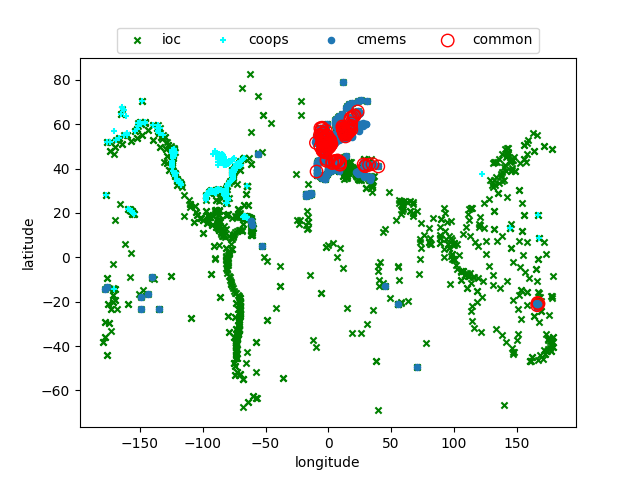

In [49]:
ioc_stations.plot.scatter(x = 'longitude', y = 'latitude', color='green', marker='x', label='ioc')
a = plt.gca()
coops.plot.scatter(ax=a, x = 'longitude', y = 'latitude', color='cyan', marker='+', label='coops')
cmems.plot.scatter(ax=a, x = 'longitude', y = 'latitude', marker='o', label='cmems')
plt.scatter(x=db2.longitude, y=db2.latitude, s=80, facecolors='none', edgecolors='r', label='common')
plt.legend(loc='upper center',bbox_to_anchor=(.5, 1.1), ncol=4)

### merge cmems

In [50]:
catalog = catalog.append(cmems)

catalog.reset_index(inplace=True,drop=True)
catalog

/tmp/ipykernel_19125/2258944071.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catalog = catalog.append(cmems)


,ioc_code,gloss_id,latitude,longitude,Country,Station_Name,connection,contacts,dcp_id,last_observation_level,...,sample_interval,average_delay_per_day,transmit_interval,nws_id,state,status,removed,PLATFORM_CODE,INSTITUTION,INSTITUTION_EDMO_CODE
0,abas,327,44.0200,144.29000,Japan,Abashiri,SWJP40,Japan Meteorological Agency ( Japan ),ABASHIRI,2.15,...,1',8',10',<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN
1,abed,<NA>,57.1400,-2.08000,UK,Aberdeen,ftp,National Oceanography Centre ( UK ),NaN,2.45,...,15',25',15',<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN
2,abur,82,31.5800,131.41000,Japan,Aburatsu,SWJP40,Japan Meteorological Agency ( Japan ),ABURATSU,3.13,...,1',8',10',<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN
3,acaj,182,13.5740,-89.83800,El Salvador,Acajutla,SZXX01,Ministerio de Medio Ambiente y Recursos Natura...,300434064008810,6.99,...,1',2',5',<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN
4,acap,267,16.8330,-99.91700,Mexico,Acapulco,SEPA40,Centro de Investigación Científica y de Educac...,3540E15A,8.26,...,1',NaN,5',<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,NaN,<NA>,5.2500,-52.62000,NaN,Iles Du Salut,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,IlesDuSalutTG,SHOM Service Hydrographique et Oceanographiqu...,540
2491,NaN,<NA>,34.7263,33.34020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,IDSL-ZygiMarina,Joint Research Centre(JRC);Cyprus Oceanography...,2688 711
2492,NaN,<NA>,37.9425,22.93360,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,IDSL-Corinth,Joint Research Centre(JRC);National Observator...,2688 1202
2493,NaN,<NA>,39.9876,3.82815,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,IDSL-Ciutadella,Joint Research Centre(JRC);Instituto Geogr\u00...,2688


### test IOC and CMEMS data

In [51]:
cc = catalog.loc[catalog.Station_Name.isin(db2_.Station_Name)]

In [52]:
test = cc.loc[cc.Station_Name=="Bangor"]
test = test.rename(columns={'longitude':'lon','latitude':'lat','Country':'country','Station_Name':'location'})

#### IOC

In [53]:
url = "http://www.ioc-sealevelmonitoring.org/bgraph.php?code={}&output=tab&period=30&endtime={}".format('bang','2023-7-30') # use IOC code value
url

'http://www.ioc-sealevelmonitoring.org/bgraph.php?code=bang&output=tab&period=30&endtime=2023-7-30'

In [54]:
data = ioc.get_ioc_data(
    ioc_metadata=test,
    endtime="2023-07-30",
    period=30,
)
data = data.to_dataframe().reset_index(level= 'ioc_code',drop=True)
data = data.rename(columns={'bub':'slev','lon':'longitude','lat':'latitude','country':'Country','location':'Station_Name'})
data = data['slev']
data

100%|██████████| 2/2 [00:00<00:00,  3.79it/s]


time
2023-06-30 00:00:00    1.748
2023-06-30 00:15:00    1.642
2023-06-30 00:30:00    1.549
2023-06-30 00:45:00    1.462
2023-06-30 01:00:00    1.386
                       ...  
2023-07-29 23:00:00    2.540
2023-07-29 23:15:00    2.437
2023-07-29 23:30:00    2.307
2023-07-29 23:45:00    2.185
2023-07-30 00:00:00    2.043
Name: slev, Length: 2860, dtype: float64

#### CMEMS

In [55]:
from erddapy import ERDDAP

e = ERDDAP(
  server="https://nrt.cmems-du.eu/erddap",
  protocol="tabledap",
)


/usr/local/lib/python3.10/dist-packages/trio/_core/_multierror.py:406: RuntimeWarning: IPython detected, but you already have a custom exception handler installed. I'll skip installing Trio's custom handler, but this means exception groups will not show full tracebacks.
  warnings.warn(


In [56]:
e.dataset_id = 'copernicus_GLO_insitu_nrt_TG'

In [57]:
e.constraints = {
    "time>=": "2023-06-30 T00:00:00Z",
    "time<=": "2023-07-30 T00:00:00Z",
    "PLATFORM_CODE=": "Bangor",
}


In [58]:
e.variables = [
    "time",
    "SLEV"
]


In [59]:
df = e.to_pandas()#low_memory=False)

df['time (UTC)'] = pd.DatetimeIndex(df['time (UTC)'])
df = df.set_index('time (UTC)')

df.index = df.index.tz_convert(None)
df.columns = ['slev']
df['slev'] = df['slev'].apply(pd.to_numeric)
df

,slev
time (UTC),
2023-07-01 00:00:00,2.209
2023-07-01 00:15:00,2.070
2023-07-01 00:30:00,1.942
2023-07-01 00:45:00,1.803
2023-07-01 01:00:00,1.673
...,...
2023-07-29 23:00:00,2.540
2023-07-29 23:15:00,2.437
2023-07-29 23:30:00,2.307


In [60]:
(data['2023-07-01 0:0:0':'2022-07-29 0:0:0'] - df['2023-07-01 0:0:0':'2023-07-30 0:0:0']).max()

slev   NaN
dtype: float64

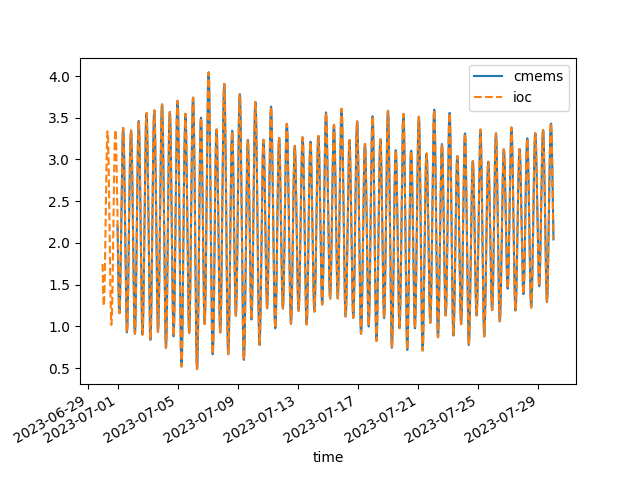

In [61]:
df.plot()
p=plt.gca()
data.plot(ax=p, linestyle='--')
plt.legend(['cmems','ioc'])

#### check duplicates with EMODNET

In [62]:
de = emodnet.Station_Name.isin(catalog.Station_Name)
de.sum()

0

### merge emodnet

In [63]:
catalog = catalog.append(emodnet)

catalog.reset_index(inplace=True,drop=True)
catalog

/tmp/ipykernel_19125/2262225713.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catalog = catalog.append(emodnet)


,ioc_code,gloss_id,latitude,longitude,Country,Station_Name,connection,contacts,dcp_id,last_observation_level,...,area,author,source,contributor_name,contributor_url,data_assembly_center,institution_edmo_code,institution_references,institution,wmo_platform_code
0,abas,327,44.02000,144.29000,Japan,Abashiri,SWJP40,Japan Meteorological Agency ( Japan ),ABASHIRI,2.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,abed,<NA>,57.14000,-2.08000,UK,Aberdeen,ftp,National Oceanography Centre ( UK ),NaN,2.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,abur,82,31.58000,131.41000,Japan,Aburatsu,SWJP40,Japan Meteorological Agency ( Japan ),ABURATSU,3.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,acaj,182,13.57400,-89.83800,El Salvador,Acajutla,SZXX01,Ministerio de Medio Ambiente y Recursos Natura...,300434064008810,6.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,acap,267,16.83300,-99.91700,Mexico,Acapulco,SEPA40,Centro de Investigación Científica y de Educac...,3540E15A,8.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2567,NaN,<NA>,41.85686,9.40383,NaN,SolenzaraTG,NaN,NaN,NaN,NaN,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540.0,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
2568,NaN,<NA>,-21.61381,166.24153,NaN,ThioTG,NaN,NaN,NaN,NaN,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540.0,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
2569,NaN,<NA>,43.12280,5.91460,NaN,ToulonTG,NaN,NaN,NaN,NaN,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540.0,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
2570,NaN,<NA>,-23.34177,-149.47554,NaN,TubuaiTG,NaN,NaN,NaN,NaN,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540.0,NaN,SHOM Service Hydrographique et Oceanographique...,NaN


## Merge GESLA3

In [64]:
m2 = pd.merge(catalog,gesla3, on=['Station_Name']).Station_Name
m2

0      Abashiri
1      Abashiri
2      Aberdeen
3      Aberdeen
4      Aberdeen
         ...   
982    Rosslare
983    Rosslare
984     Wexford
985        Wick
986        Wick
Name: Station_Name, Length: 987, dtype: object

In [65]:
i2 = catalog.loc[catalog.Station_Name.isin(m2)]
i2 = i2.drop_duplicates(['Station_Name']).reset_index(drop=True)
i2 = i2.sort_values('Station_Name').reset_index(drop=True)
i2

,ioc_code,gloss_id,latitude,longitude,Country,Station_Name,connection,contacts,dcp_id,last_observation_level,...,area,author,source,contributor_name,contributor_url,data_assembly_center,institution_edmo_code,institution_references,institution,wmo_platform_code
0,NaN,<NA>,56.150,10.2167,NaN,Aarhus,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,abas,327,44.020,144.2900,Japan,Abashiri,SWJP40,Japan Meteorological Agency ( Japan ),ABASHIRI,2.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,abed,<NA>,57.140,-2.0800,UK,Aberdeen,ftp,National Oceanography Centre ( UK ),NaN,2.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,abur,82,31.580,131.4100,Japan,Aburatsu,SWJP40,Japan Meteorological Agency ( Japan ),ABURATSU,3.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,acaj,182,13.574,-89.8380,El Salvador,Acajutla,SZXX01,Ministerio de Medio Ambiente y Recursos Natura...,300434064008810,6.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,work,<NA>,54.650,-3.5700,UK,Workington,ftp,National Oceanography Centre ( UK ),NaN,7.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,yaku,<NA>,59.548,-139.7350,USA,Yakutat,web,National Ocean Service-NOAA ( USA ),336B0522,2.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
469,ysta,<NA>,55.423,13.8260,Sweden,Ystad2,web,Swedish Meteorological and Hydrological Instit...,NaN,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,zanz,297,-6.150,39.1830,Tanzania,Zanzibar,SXXX33,Department of Land and Survey ( Tanzania ) +Un...,1605D3E0,3.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
g2 = gesla3.loc[gesla3.Station_Name.isin(m2)]
g2 = g2.sort_values('Station_Name').reset_index(drop=True)
g2

,filename,Station_Name,site_code,country,contributor_abbreviated,contributor_full,contributor_website,contributor_contact,orginator,originator_website,...,start_date_time,end_date_time,number_of_years,time_zone_hours,datum_information,instrument,precision,null_value,gauge_type,overall_record_quality
0,aarhus-aar-dnk-cmems,Aarhus,Aar,DNK,CMEMS,Copernicus Marine Environment Monitoring Service,https://resources.marine.copernicus.eu/?option...,instacco@ifremer.fr,Danish Meteorological Institute (DMI),www.dmi.dk,...,2005-01-01 00:00:00,2020-12-17 07:50:00,16,0,DVR90,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
1,abashiri-347a-jpn-uhslc,Abashiri,347A,JPN,UHSLC,University of Hawaii Sea Level Center,https://uhslc.soest.hawaii.edu,philiprt@hawaii.edu,Japan Oceanographic Data Center Japan,Unspecified,...,1968-01-01 00:00:00,2018-12-31 14:00:00,51,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
2,abashiri-ma02-jpn-jodc_jma,Abashiri,MA02,JPN,JODC_JMA,Japan Oceanographic Data Center,https://jdoss1.jodc.go.jp/vpage/tide.html,analysis@jodc.go.jp,Japan Meteorological Agency,https://jdoss1.jodc.go.jp/vpage/tide.html,...,1967-12-31 15:00:00,2019-12-31 14:00:00,53,0,Zero of Tide Height,Float,Unspecified,-99.9999,Coastal,No obvious issues
3,aberdeen-9441187-usa-noaa,Aberdeen,9441187,USA,NOAA,National Oceanic and Atmospheric Administration,https://api.tidesandcurrents.noaa.gov/api/prod/,co-ops.userservices@noaa.gov,National Oceanic and Atmospheric Administration,https://api.tidesandcurrents.noaa.gov/api/prod/,...,2004-01-01 01:00:00,2005-12-14 17:00:00,2,0,Station Datum,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
4,aberdeen-abe-gbr-cmems,Aberdeen,Abe,GBR,CMEMS,Copernicus Marine Environment Monitoring Service,https://resources.marine.copernicus.eu/?option...,instacco@ifremer.fr,National Oceanography Centre (United_Kingdom),http://noc.ac.uk/ http://www.puertos.es,...,1990-01-01 02:00:00,2021-01-31 23:00:00,32,0,Admiralty Chart Datum,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,workington-wor-gbr-cmems,Workington,Wor,GBR,CMEMS,Copernicus Marine Environment Monitoring Service,https://resources.marine.copernicus.eu/?option...,instacco@ifremer.fr,National Oceanography Centre (United_Kingdom),http://noc.ac.uk/ http://www.puertos.es,...,1992-02-05 22:00:00,2021-01-31 23:00:00,30,0,Admiralty Chart Datum,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
706,yakutat-9453220-usa-noaa,Yakutat,9453220,USA,NOAA,National Oceanic and Atmospheric Administration,https://api.tidesandcurrents.noaa.gov/api/prod/,co-ops.userservices@noaa.gov,National Oceanic and Atmospheric Administration,https://api.tidesandcurrents.noaa.gov/api/prod/,...,1961-01-01 01:00:00,2021-08-31 23:00:00,61,0,Station Datum,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
707,ystad2-yst-swe-cmems,Ystad2,Yst,SWE,CMEMS,Copernicus Marine Environment Monitoring Service,https://resources.marine.copernicus.eu/?option...,instacco@ifremer.fr,Swedish Meteorological and Hydrological Instit...,www.smhi.se,...,2019-07-01 00:00:00,2020-12-17 07:00:00,2,0,BSCD2000,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
708,zanzibar-151a-tza-uhslc,Zanzibar,151A,TZA,UHSLC,University of Hawaii Sea Level Center,https://uhslc.soest.hawaii.edu,philiprt@hawaii.edu,University of Hawaii Sea Level Center (UHSLC)...,Unspecified,...,1984-03-01 10:00:00,2018-12-31 23:00:00,35,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues


In [67]:
print(np.abs(i2.longitude - g2.longitude).max())
print(np.abs(i2.latitude - g2.latitude).max())

337.31100000000004
127.12010099999999


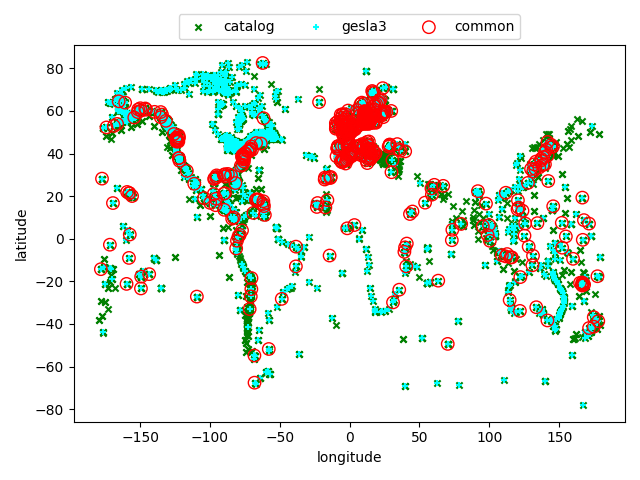

In [78]:
catalog.plot.scatter(x = 'longitude', y = 'latitude', color='green', marker='x', label='catalog')
a = plt.gca()
gesla3.plot.scatter(ax=a, x = 'longitude', y = 'latitude', color='cyan', marker='+', label='gesla3')

plt.scatter(x=i2.longitude, y=i2.latitude, s=80, facecolors='none', edgecolors='r', label='common')
plt.legend(loc='upper center',bbox_to_anchor=(.5, 1.1), ncol=10)
plt.tight_layout()

In [69]:
unique = gesla3[~gesla3.Station_Name.isin(m2)]
unique

,filename,Station_Name,site_code,country,contributor_abbreviated,contributor_full,contributor_website,contributor_contact,orginator,originator_website,...,start_date_time,end_date_time,number_of_years,time_zone_hours,datum_information,instrument,precision,null_value,gauge_type,overall_record_quality
0,aasiaat-aas-grl-gloss,Aasiaat,AAS,GRL,GLOSS,Global Sea Level Observing System,https://www.gloss-sealevel.org,I.D.Haigh@soton.ac.uk,Global Sea Level Observing System,https://www.gloss-sealevel.org,...,1997-06-26 15:53:00,1999-06-28 11:18:00,3,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
1,maniitsoq-man-grl-gloss,Maniitsoq,MAN,GRL,GLOSS,Global Sea Level Observing System,https://www.gloss-sealevel.org,I.D.Haigh@soton.ac.uk,Global Sea Level Observing System,https://www.gloss-sealevel.org,...,1997-06-30 21:02:00,1999-06-20 23:53:00,3,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
4,san_francisco_ca-551a-usa-uhslc,San_Francisco_CA,551A,USA,UHSLC,University of Hawaii Sea Level Center,https://uhslc.soest.hawaii.edu,philiprt@hawaii.edu,National Ocean Service (NOS) National Oceani...,Unspecified,...,1897-08-01 08:00:00,2018-12-31 23:00:00,122,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
8,honolulu_hawaii-057b-usa-uhslc,Honolulu_Hawaii,057B,USA,UHSLC,University of Hawaii Sea Level Center,https://uhslc.soest.hawaii.edu,philiprt@hawaii.edu,National Ocean Service (NOS) National Oceani...,Unspecified,...,1905-01-01 10:00:00,2018-12-31 23:00:00,114,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
9,galveston_pier_21-775a-usa-uhslc,Galveston_Pier_21,775A,USA,UHSLC,University of Hawaii Sea Level Center,https://uhslc.soest.hawaii.edu,philiprt@hawaii.edu,National Ocean Service (NOS) National Oceani...,Unspecified,...,1904-01-01 06:00:00,2018-12-31 23:00:00,114,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,puerto_chiapas-318-mex-unam,Puerto_Chiapas,318,MEX,UNAM,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,mareografico@geofisica.unam.mx,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,...,1986-01-01 00:00:00,1988-12-31 23:00:00,3,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
5113,sanchez_magallanes-417-mex-unam,Sanchez_Magallanes,417,MEX,UNAM,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,mareografico@geofisica.unam.mx,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,...,2016-01-01 00:00:00,2018-12-31 23:00:00,3,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
5114,sian_ka_an-418-mex-unam,Sian_Ka_An,418,MEX,UNAM,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,mareografico@geofisica.unam.mx,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,...,2016-01-01 00:00:00,2018-12-31 23:00:00,3,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
5116,zihuatanejo-509-mex-unam,Zihuatanejo,509,MEX,UNAM,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,mareografico@geofisica.unam.mx,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,...,2011-01-01 00:00:00,2013-12-30 11:00:00,3,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues


In [70]:
gesla3 = gesla3.rename(columns={'country':'Country'})

In [71]:
catalog = catalog.append(gesla3)
catalog.reset_index(inplace=True,drop=True)
catalog

/tmp/ipykernel_19125/4185812424.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catalog = catalog.append(gesla3)


,ioc_code,gloss_id,latitude,longitude,Country,Station_Name,connection,contacts,dcp_id,last_observation_level,...,start_date_time,end_date_time,number_of_years,time_zone_hours,datum_information,instrument,precision,null_value,gauge_type,overall_record_quality
0,abas,327,44.020000,144.290000,Japan,Abashiri,SWJP40,Japan Meteorological Agency ( Japan ),ABASHIRI,2.15,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,abed,<NA>,57.140000,-2.080000,UK,Aberdeen,ftp,National Oceanography Centre ( UK ),NaN,2.45,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,abur,82,31.580000,131.410000,Japan,Aburatsu,SWJP40,Japan Meteorological Agency ( Japan ),ABURATSU,3.13,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,acaj,182,13.574000,-89.838000,El Salvador,Acajutla,SZXX01,Ministerio de Medio Ambiente y Recursos Natura...,300434064008810,6.99,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,acap,267,16.833000,-99.917000,Mexico,Acapulco,SEPA40,Centro de Investigación Científica y de Educac...,3540E15A,8.26,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7686,NaN,<NA>,19.312667,-87.446333,MEX,Sian_Ka_An,NaN,NaN,NaN,NaN,...,2016-01-01,2018-12-31 23:00:00,3.0,0.0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
7687,NaN,<NA>,21.161667,-90.048333,MEX,Sisal,NaN,NaN,NaN,NaN,...,2011-01-01,2013-12-30 11:00:00,3.0,0.0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
7688,NaN,<NA>,17.636667,-101.558333,MEX,Zihuatanejo,NaN,NaN,NaN,NaN,...,2011-01-01,2013-12-30 11:00:00,3.0,0.0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
7689,NaN,<NA>,20.858333,-90.403333,MEX,Celestun,NaN,NaN,NaN,NaN,...,2010-01-01,2011-12-31 23:00:00,2.0,0.0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues


In [72]:
catalog.duplicated('Station_Name').sum()

1589

# Merge all the data together 

In [74]:
grouped_df = catalog.groupby('Station_Name', as_index=False).agg(lambda x: x.dropna().iloc[0] if x.notna().any() else pd.NA)

In [75]:
grouped_df

,Station_Name,ioc_code,gloss_id,latitude,longitude,Country,connection,contacts,dcp_id,last_observation_level,...,start_date_time,end_date_time,number_of_years,time_zone_hours,datum_information,instrument,precision,null_value,gauge_type,overall_record_quality
0,A Coru\u00f1a 2 tide gauge,<NA>,<NA>,43.357000,-8.389000,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,A Coru\u00f1a ACOR1 TG tide gauge,<NA>,<NA>,43.364400,-8.398900,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,A Coruña,acor1,<NA>,43.364000,-8.399000,Spain,web,Instituto Geográfico Nacional ( Spain ),<NA>,4.27,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,A121,<NA>,<NA>,55.400002,3.810000,NLD,<NA>,<NA>,<NA>,<NA>,...,2015-06-28 00:00:00,2020-10-06 07:40:00,6.0,0.0,MSL,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
4,A2,<NA>,<NA>,51.360600,3.118330,BEL,<NA>,<NA>,<NA>,<NA>,...,2020-02-28 00:00:00,2021-01-12 08:55:00,2.0,0.0,MSL,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6096,\u00d6lands norra udd,<NA>,<NA>,57.366100,17.097200,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6097,papho,<NA>,<NA>,34.755100,32.408798,CYP,<NA>,<NA>,<NA>,<NA>,...,2014-11-01 00:00:00,2016-08-26 01:00:00,3.0,0.0,Unknown,Unspecified,Unspecified,-99.9999,Coastal,Possible quality control issues
6098,s_Gravendeel,<NA>,<NA>,51.779151,4.625854,NLD,<NA>,<NA>,<NA>,<NA>,...,1970-10-30 07:00:00,1983-12-31 22:00:00,14.0,0.0,Normal Amsterdam Level,Unspecified,Unspecified,-99.9999,River,No obvious issues
6099,s_Gravendeel_haven,<NA>,<NA>,51.782206,4.625803,NLD,<NA>,<NA>,<NA>,<NA>,...,1983-12-31 23:00:00,1992-12-31 22:50:00,10.0,0.0,Normal Amsterdam Level,Unspecified,Unspecified,-99.9999,River,No obvious issues


In [77]:
grouped_df.to_csv('catalog_new.csv')